# Modelo Segmento Empresarial
# Ejercicio de cluster y portafolio ideal
# DBSCAN y Rank Agreggation

In [5]:
#cluster

In [1]:
import pandas as pd
import pandas_profiling
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import OPTICS
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.linear_model import LinearRegression
from math import sin
from sklearn.preprocessing import LabelEncoder
import rankaggregation as ra

pd.set_option("display.max_columns", None)# Varibles Modelo Segmento Empresarial

In [2]:
dm_v0 = pd.read_csv("empresas_activas.csv")
df2 = pd.read_csv("datamart_transaccional_empresarial.csv", sep = "|")

In [3]:
df2.SOLD_TO = df2.SOLD_TO.str.replace("\D", "")
df2.SOLD_TO = pd.to_numeric(df2.SOLD_TO, errors = "coerce")

In [4]:
df2 = df2[df2.SEGMENTO_PRODUCTO != "SUPERMERCADOS"]
df2 = df2[df2.SEGMENTO_PRODUCTO != "DISPENSACIÓN MEDICAMENTOS"]
df2 = df2[df2.SEGMENTO_PRODUCTO != "EXHIBICIÓN ESPACIOS SUPERMERCADOS"]

In [5]:
dm_v0 = dm_v0.dropna(thresh = 39)
dm_v0 = dm_v0.drop(dm_v0[dm_v0.id_empresa.isna()].index)

pd.DataFrame(dm_v0.isna().sum()/dm_v0.shape[0] * 100).transpose()

,id_empresa,razon_social,interlocutor,tipo_identificacion,numero_identificacion,actividad_economica,segmento_piramide1,segmento_piramide2,antiguedad_empresa,localidad_empresa,numero_empleados,moda_estrato,edad_promedio,porcentaje_edad_rango1,porcentaje_edad_rango2,porcentaje_edad_rango3,porcentaje_edad_rango4,porcentaje_edad_rango5,porcentaje_is_hombre,porcentaje_is_mujer,porcentaje_tiene_discapacidad,porcentaje_salario_rango1,porcentaje_salario_rango2,porcentaje_salario_rango3,porcentaje_salario_rango4,porcentaje_salario_rango5,porcentaje_salario_rango6,porcentaje_segmento_poblacional_basico,porcentaje_segmento_poblacional_medio,porcentaje_segmento_poblacional_joven,porcentaje_segmento_poblacional_alto,porcentaje_sin_beneficiarios,porcentaje_tiene_hijos_hombres,porcentaje_tiene_hijos_mujeres,porcentaje_tiene_hermanos,porcentaje_tiene_conyuge,porcentaje_tiene_padre_beneficiario,porcentaje_tiene_madre_beneficiaria,porcentaje_tiene_hijos,porcentaje_PACF,porcentaje_famisanar,porcentaje_estrato_1,porcentaje_estrato_2,porcentaje_estrato_3,porcentaje_estrato_4,porcentaje_estrato_5,porcentaje_estrato_6,porcentaje_estrato_blank,porcentaje_nivel_educativo_Alfabeta,porcentaje_nivel_educativo_Bachillerato,porcentaje_nivel_educativo_Doctorado,porcentaje_nivel_educativo_Ninguno,porcentaje_nivel_educativo_No Formal,porcentaje_nivel_educativo_Postgrado,porcentaje_nivel_educativo_Primaria,porcentaje_nivel_educativo_Profesional,porcentaje_nivel_educativo_Tecnico,porcentaje_nivel_educativo_Tecnologo,porcentaje_nivel_educativo_blank,porcentaje_estado_civil_Casado,porcentaje_estado_civil_Separado,porcentaje_estado_civil_Soltero,porcentaje_estado_civil_Unión Libre,porcentaje_estado_civil_Viudo/a,porcentaje_categoria_afiliacion_A,porcentaje_categoria_afiliacion_B,porcentaje_categoria_afiliacion_C,porcentaje_tipo_contrato01,porcentaje_tipo_contrato02,porcentaje_tipo_contrato_blank,antiguedad_historica_empleados,antiguedad_empresa_actual,beneficiarios_edad_rango1,beneficiarios_edad_rango2,beneficiarios_edad_rango3,beneficiarios_edad_rango4,beneficiarios_edad_rango5,beneficiarios_edad_rango6,beneficiarios_edad_rango7,beneficiarios_edad_rango8,beneficiarios_edad_rango9,beneficiarios_edad_rango10,porcentaje_zch_bcum,porcentaje_zch_rsfmt,porcentaje_zch_rsemt,porcentaje_zch_rsemu,porcentaje_zch_blon,porcentaje_zch_kite,status_riesgo,id_unico_empresa_principal
0,0.0,0.0,0.0,0.0,0.0,0.0,0.974591,0.974591,0.0,0.0,0.0,38.739993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.060216,0.974591


In [6]:
dm_v0.moda_estrato.value_counts(dropna= False)
dm_v0.moda_estrato = dm_v0.moda_estrato.map({"estrato_1": 1, "estrato_2": 2, "estrato_3": 3, "estrato_4": 4, "estrato_5": 5, "estrato_6": 6})
dm_v0.moda_estrato = pd.to_numeric(dm_v0.moda_estrato, errors = "coerce")
dm_v0.moda_estrato = dm_v0.moda_estrato.fillna(dm_v0.moda_estrato.mean())

In [7]:
dm_id = dm_v0.iloc[:,0]

In [8]:
dm_v0 = dm_v0[["actividad_economica", "antiguedad_empresa", "numero_empleados", "moda_estrato", "edad_promedio", "antiguedad_historica_empleados", "porcentaje_segmento_poblacional_basico", "porcentaje_segmento_poblacional_medio", "porcentaje_segmento_poblacional_joven", "porcentaje_segmento_poblacional_alto", "porcentaje_nivel_educativo_Alfabeta", "porcentaje_nivel_educativo_Bachillerato", "porcentaje_nivel_educativo_Doctorado", "porcentaje_nivel_educativo_Ninguno"]]

In [9]:
dm_v0_num = dm_v0.select_dtypes(exclude= ["object"])

In [10]:
np.random.RandomState(42)

dm_v0_num.edad_promedio[(dm_v0_num.edad_promedio == 0.0) | (dm_v0_num.edad_promedio == np.nan)] = np.random.normal(np.mean(dm_v0_num.edad_promedio[dm_v0_num.edad_promedio > 0]), \
                                                                                                                 np.std(dm_v0_num.edad_promedio[dm_v0_num.edad_promedio > 0]), \
                                                                                                                 len(dm_v0_num.edad_promedio[(dm_v0_num.edad_promedio == 0) | (dm_v0_num.edad_promedio == np.nan)]))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [11]:
np.random.RandomState(42)

dm_v0_num.antiguedad_empresa[(dm_v0_num.antiguedad_empresa == 0.0) | (dm_v0_num.antiguedad_empresa == np.nan)] = np.random.chisquare(np.mean(dm_v0_num.antiguedad_empresa[dm_v0_num.antiguedad_empresa > 0]),
                                                                                                                 len(dm_v0_num.antiguedad_empresa[(dm_v0_num.antiguedad_empresa == 0) | (dm_v0_num.antiguedad_empresa == np.nan)]))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [12]:
np.random.RandomState(42)

dm_v0_num.antiguedad_historica_empleados[(dm_v0_num.antiguedad_historica_empleados == 0.0) | (dm_v0_num.antiguedad_historica_empleados == np.nan)] = np.random.chisquare(np.mean(dm_v0_num.antiguedad_historica_empleados[dm_v0_num.antiguedad_historica_empleados > 0]),
                                                                                                                 len(dm_v0_num.antiguedad_historica_empleados[(dm_v0_num.antiguedad_historica_empleados == 0) | (dm_v0_num.antiguedad_historica_empleados == np.nan)]))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [13]:
dm_pred = StandardScaler().fit_transform(dm_v0_num)

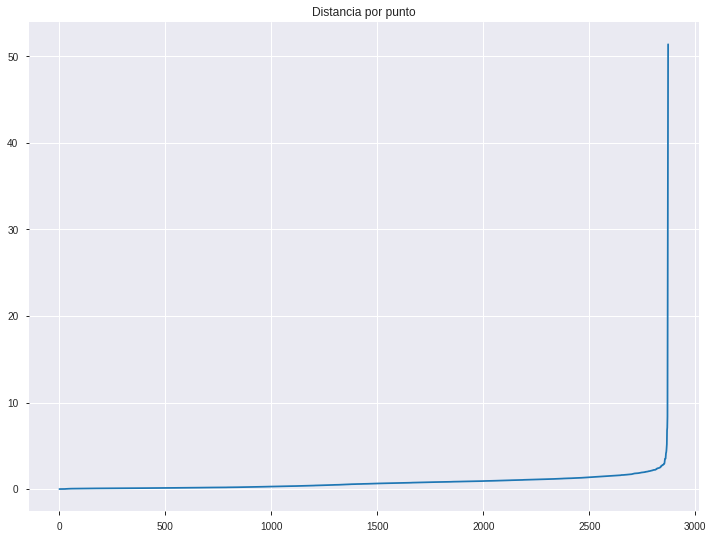

In [14]:
## Analysis for choosing epsilon space

neigh = NearestNeighbors(n_neighbors=100)
nbrs = neigh.fit(dm_pred)
distances, indices = nbrs.kneighbors(dm_pred)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.figure(figsize=(12, 9))
plt.plot(distances)
plt.title("Distancia por punto")
plt.show()

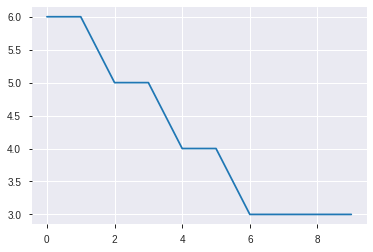

In [23]:
n_clusters = []
n_noise = []

for i in np.arange(50.0, 60.0):
    db = DBSCAN(eps=i).fit(dm_v0_num)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_


    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    n_clusters.append(n_clusters_)
    n_noise.append(n_noise_)
    
    ##print('DBSCAN with epsilon ' + str(i) + ': Estimated number of clusters: %d' % n_clusters_)
    ##print('DBSCAN: Estimated number of noise points: %d' % n_noise_, "\n\n\n")
    

ax1 = plt.plot(n_clusters)
#ax2 = plt.plot(n_noise)
plt.show()

In [16]:
db = DBSCAN(eps= 22).fit(dm_v0_num)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
    
n_clusters.append(n_clusters_)
n_noise.append(n_noise_)
    
print('DBSCAN: Estimated number of clusters: %d' % n_clusters_)
print('DBSCAN: Estimated number of noise points: %d' % n_noise_)

DBSCAN: Estimated number of clusters: 24
DBSCAN: Estimated number of noise points: 483


In [18]:
dm_cluster = pd.concat([dm_v0, pd.Series(db.labels_)], axis = 1)
dm_cluster = dm_cluster.rename(columns = {dm_cluster.columns[-1]:'cluster_dbscan'})

In [19]:
dm_cluster = pd.concat([dm_id, dm_cluster], axis=1)

In [20]:
dm_cluster = dm_cluster.merge(df2, left_on='id_empresa', right_on='SOLD_TO', how = "inner")

In [21]:
dm_cluster.to_csv("Epsilon_22.csv")

In [22]:
dm_cluster_no_duplicates = dm_cluster.drop_duplicates(subset = "id_empresa") 

In [23]:
dm_cluster_no_duplicates.cluster_dbscan.unique()

array([ 0, -1,  1,  2,  3,  5,  6,  8,  4,  7,  9, 18, 19, 17, 11, 12, 13,
       10, 22, 14, 24, 15, 16, 23, 21, 20])

In [24]:
dm_cluster_no_duplicates.to_csv("No_duplicates.csv")

# Portafolio

## Rank aggregation:

Para que el RA funcione, hay que hacer varios preparativos. Por un lado hay que crear las listas de productos. Sin embargo, estas listas deben estar organizadas de acuerdo a un criterio. Este algoritmo espera que haya un "ranking", i.e. que el índice cumpla una función ordinal.


Para eso, haremos un groupby de cada producto por empresa donde se cuenten las veces que aparece cada producto. Esto nos dará una regla interesante: los productos estarán ordenados por frecuencia.

In [25]:
training = dm_cluster[["NOMBRE_PRODUCTO", "id_empresa", "cluster_dbscan"]]

In [26]:
def rankAggProd(df):
    """
    Esta función recibe el DataFrame indexado con id_empresas, cluster_dbscan, y NOMBRE_PRODUCTO. Con ello, hace un Rank
    Aggregation por cluster, ordenando los productos por empresa de acuerdo a la frecuencia de transacciones en la tabla
    Transaccional. Luego Pasa el Rank Aggregation con estas numerosas listas y guarda los resultados en un diccionario.
    """
    dm_rank = df.groupby(["id_empresa", "cluster_dbscan", "NOMBRE_PRODUCTO"]).size().reset_index(name="Freq")
    cluster_list = dm_rank.cluster_dbscan.unique()
    ranks_x_cluster = {}

    for cluster in cluster_list:
        agg = ra.RankAggregator()
        empresa_list = dm_rank[dm_rank.cluster_dbscan == cluster]["id_empresa"].unique()
        prods_x_empresa = []
        for empresa in empresa_list:
            dm_prod = dm_rank[(dm_rank.cluster_dbscan == cluster) & (dm_rank.id_empresa == empresa)][["NOMBRE_PRODUCTO", "Freq"]].sort_values(by = ["Freq"], ascending = False)
            prod_list = list(dm_prod.NOMBRE_PRODUCTO)
            prods_x_empresa.append(prod_list)
        ranked_prods = agg.instant_runoff(prods_x_empresa)
        ranks_x_cluster[cluster] = ranked_prods
    return ranks_x_cluster

In [27]:
## Aqui pasa la magia
ranks_x_cluster = rankAggProd(training)

In [33]:
list = [(k, v) for k, v in ranks_x_cluster.items()] 
df_f = pd.DataFrame(list)

In [35]:
df_f.to_csv("df_f.csv")